# Exploración de Datos
Cervezas

A continuación exploraremos el dataset "Beers, Breweries, and Beer Reviews" obtenido de las plataforma kaggle.com, para el desarrollo de un algoritmo de recomendación para cervezas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Iniciaremos cargando las bases de datos y viendo que tipos de datos contienen:

In [2]:
beers = pd.read_csv("BBR/beers.csv")
breweries = pd.read_csv("BBR/breweries.csv")
|111qqq222q1

## Database/Beers
Observamos la primer base de datos, la cual contiene información de 358,873 cervezas, los datos interés son:
<ol>
    <li>Nombre
    <li>Identificación
    <li>Identificación de la cervecería
    <li>Origen (país/estado)
    <li>Tipo de cerveza
    <li>Disponibilidad (Epoca del año)
    <li>Alcohol por volumen (abv)
</ol>    

In [3]:
display(beers.head())
print('Existen datos de ' + str(len(beers))[:3]+','+str(len(beers))[3:] + ' cervezas, clasificadas en ' + str(len(beers['style'].unique())) + ' estilos, de ' + str(len(beers['country'].unique())) +' países')

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


Existen datos de 358,873 cervezas, clasificadas en 113 estilos, de 194 países


### ¿Que países tienen más cervezas diferentes?

Para tener una idea mas clara de la información que ahora poseemos, podemos visualizar la cantidad de cervezas distintas por país, podemos empezar por conocer los 20 países con mas cantidad de cervezas diferentes.

In [111]:
continents = pd.read_csv("SUP/continents.csv")
continents_mod = continents[['name', 'alpha-2', 'region', 'sub-region']]

beers_per_country = beers.groupby('country').size().sort_values(ascending=False)
top_20_beers_per_country = beers_per_country[:20].to_frame().reset_index().rename(columns={0:'beers_per_country'})

top_20_beers_per_country_by_name = top_20_beers_per_country.merge(continents_mod,how='left', left_on='country', right_on='alpha-2')


#display(top_20_beers_per_country_by_name[['name','beers_per_country']].set_index('name'))

Podemos apreciar que las cervezas de Estados unidos ocupan un 73.37% de nuestra base de datos, por lo que lo omitiremos de la gráfica, pues tiene 10 veces mas cervezas distintas que el segundo puesto.

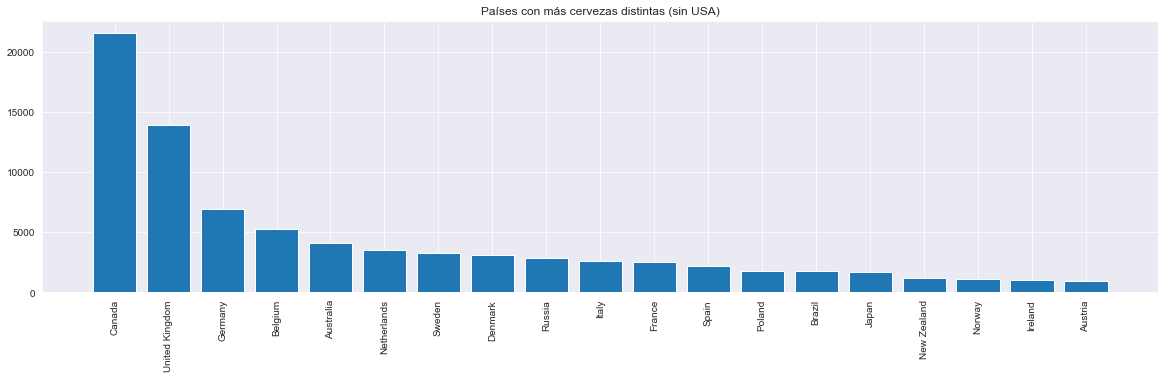

In [114]:
top_20_beers_per_country_by_name_no_us = top_20_beers_per_country_by_name[top_20_beers_per_country_by_name['alpha-2'] != 'US']
non_us_top10_beer = top_20_beers_per_country_by_name_no_us[:10]

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(20,5))

ax.bar(top_20_beers_per_country_by_name_no_us['name'], top_20_beers_per_country_by_name_no_us['beers_per_country'])
plt.xticks(rotation=90)
plt.title("Países con más cervezas distintas (sin USA)")
plt.show()

In [187]:
print('Como dato importante, sabemos que México tiene ' + str(beers_per_country['MX'])+ ' cervezas distintas')

Como dato importante, sabemos que México tiene 839 cervezas distintas


### ¿Cuales son los estilos de cerveza mas populares?
Al igual que saber de donde provienen las cervezas, es importante darse una idea del estilo que las define.

In [8]:
beers_per_style = beers.groupby(['style']).size().sort_values(ascending=False)
top_20_beers_per_style = beers_per_style[:20].to_frame().reset_index().rename(columns={0:'beers_per_style'})

top_20_beers_per_style_index = top_20_beers_per_style.set_index('style')
#display(top_20_beers_per_style_index)

beers_per_style.to_csv('beers_style.csv')

los estilos Estadounidenses, Belgas y Alemanes dominan esta categoría, veamos esto representado gráficamente.

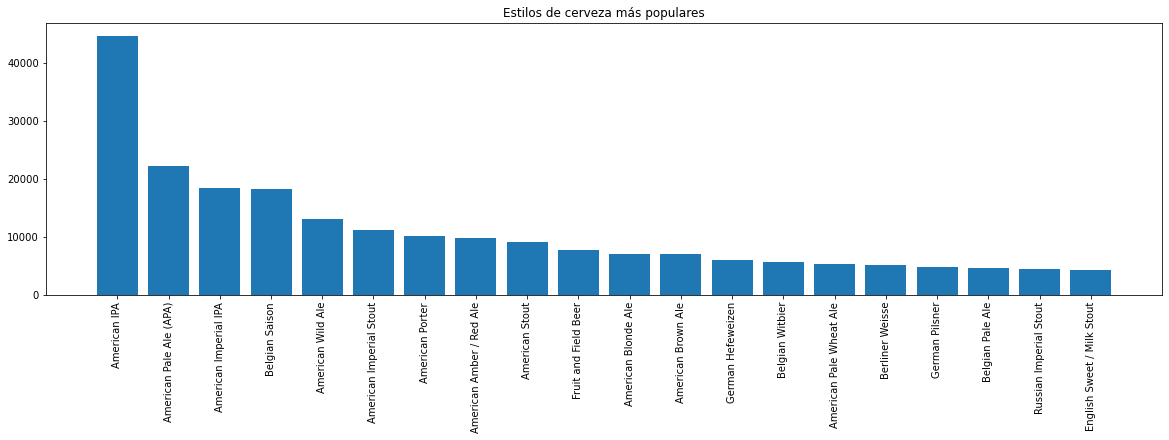

In [48]:
fig1, ax1 = plt.subplots(figsize=(20,5))

ax1.bar(top_20_beers_per_style['style'], top_20_beers_per_style_index['beers_per_style'])
plt.xticks(rotation=90)
plt.title("Estilos de cerveza más populares")
plt.show()

### Regiones y estilos del mundo en términos del ABV
El ABV (en ingles "Alcohol by Volume") es una medida estandar sobre cuanto alcohol esta contenido en una bebida alcohólica, veamos como varían estos porcentajes por region y en los 20 primeros estilos de cerveza 

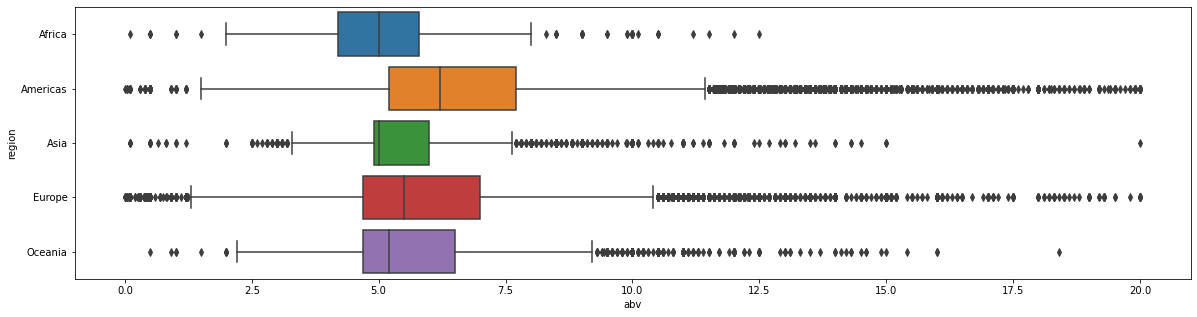

In [41]:
ax2, fig2 = plt.subplots(figsize=(20,5))
sns.boxplot(data=beers_per_continent, y='region', x='abv')
plt.show()

Esto es interesante, los datos nos dicen que en promedio, las cervezas americanas contienen mas alcohol, seguidas por las europeas, las oceánicas, las asiáticas y por último las africanas.

Veamos que datos obtenemos de comparar distintos estilos de cervezas

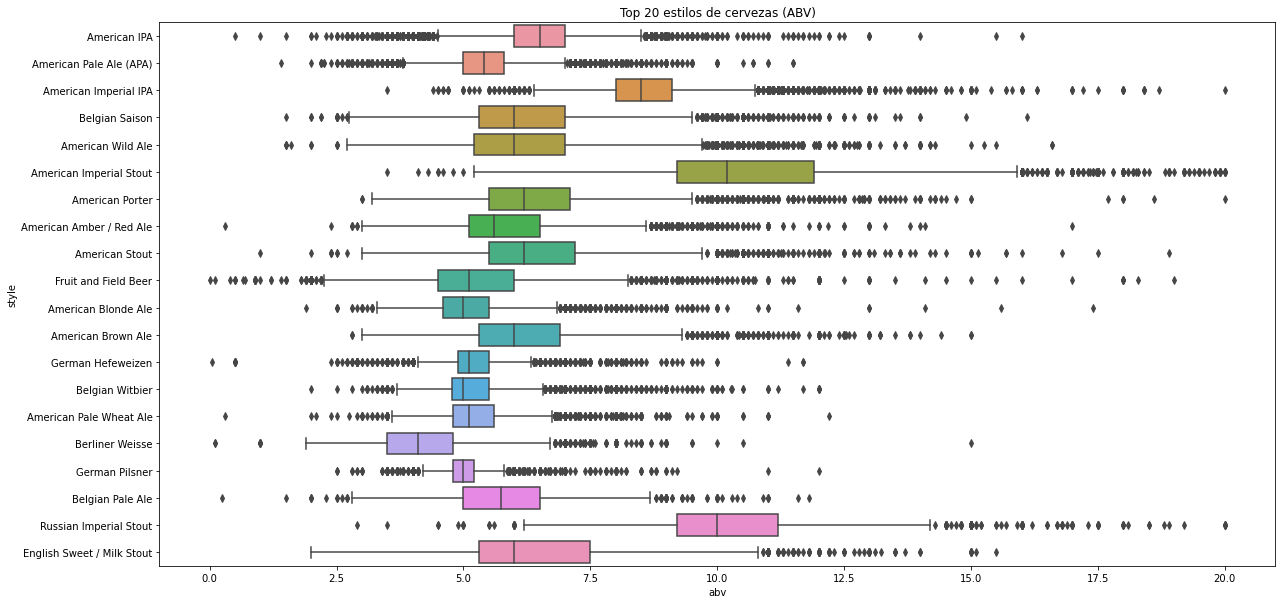

In [110]:
beers_per_style_df = beers_per_style[:20].to_frame().reset_index()['style']

beers_top_20_style = beers.set_index('style').loc[beers_per_style_df]
beers_top_20_style_mod = beers_top_20_style[beers_top_20_style['abv'] <= 20].reset_index()


ax3, fig3 = plt.subplots(figsize=(20,10))
sns.boxplot(data=beers_top_20_style_mod, y='style', x='abv')
plt.title("Top 20 estilos de cervezas (ABV)")
plt.show()

## Database/Breweries
Nuestra segunda base de datos contiene información de 50,347 cervecerías ubicadas alrededor de 200 países, nuestras variables de interés son:
<ol>
    <li>Nombre de la cervecería
    <li>Identificación de la cervecería
    <li>Origen (ciudad/país/estado)
</ol>    

In [269]:
display(breweries.head())
print('Existen datos de ' + str(len(breweries))[:2] + ',' + str(len(breweries))[2:] + ' cervecerias ubicadas alrededor de ' + str(len(breweries['country'].unique()))+ ' países')

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


Existen datos de 50,347 cervecerias ubicadas alrededor de 200 países


Si bien esta database ofrece información importante por si sola, podemos deducir datos mas relevantes al juntarla con la database 'beers', por ejemplo

### ¿Cuales son las cervecerias con más cervezas?

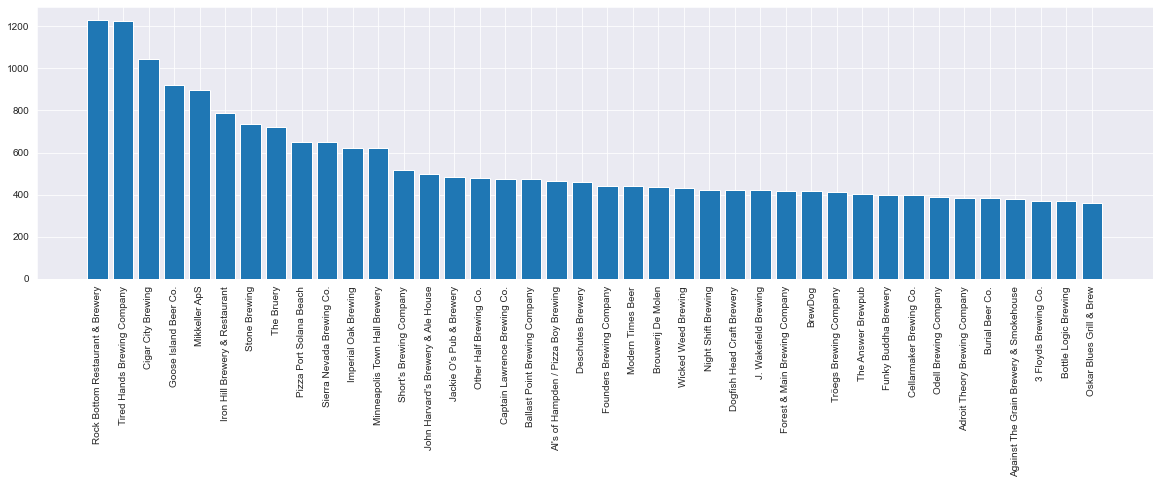

In [149]:
breweries_id_by_beers = beers.groupby('brewery_id').size().to_frame().sort_values(0, ascending = False).rename(columns={0:'brewery_per_beers'}).reset_index()

breweries_by_beers = breweries_id_by_beers.merge(breweries, how='left', left_on = 'brewery_id', right_on = 'id')[['id','name','country','types','brewery_per_beers']]

ax4, fig4 = plt.subplots(figsize=(20,5))

plt.bar(breweries_by_beers[:40]['name'], breweries_by_beers[:40]['brewery_per_beers'])
plt.xticks(rotation = 90)
plt.show()

### Cervecerías Mexicanas

Clientes objetivos de la apliación

In [172]:
display(breweries_by_beers[breweries_by_beers['country'] == 'MX'].head(20))
print('Existen ' + str(len(breweries_by_beers[breweries_by_beers['country'] == 'MX']))+' cervecerias mexicanas')

,id,name,country,types,brewery_per_beers
1459,57,"Cervecería Cuauhtémoc Moctezuma, S.A. de C.V.",MX,Brewery,55
3086,11174,Cerveceria Mexicana S.A. De C.V.,MX,Brewery,30
3897,75,Grupo Modelo S.A. de C.V.,MX,Brewery,24
4482,28480,Cerveceria Insurgente,MX,Brewery,20
4564,10541,Cucapá Brewing Company,MX,"Brewery, Eatery, Beer-to-go",20
4635,14033,Cervecería Minerva,MX,Brewery,20
4764,26988,Restaurante Bar Rámuri,MX,"Brewery, Bar",19
4920,39993,Cerveza Fauna,MX,Brewery,18
5067,11936,Sierra Madre Brewing Co.,MX,"Brewery, Eatery, Beer-to-go",18
5243,24371,Microcerveceria Gourmet Calavera,MX,Brewery,17


Existen 166 cervecerias mexicanas


In [168]:
breweries_by_country = breweries.groupby('country').size().sort_values(ascending = False)
display(breweries_by_country.head(20))

country
US    34693
GB     2525
CA     1890
DE     1812
BE      756
AU      662
FR      623
IT      580
ES      493
NL      458
RU      414
BR      380
JP      330
SE      321
MX      272
AT      247
CZ      206
PL      197
NZ      187
CH      171
dtype: int64

## Dataset/reviews

In [3]:
display(reviews.head())
review_by_profilname = reviews.groupby('review_profilename').size().sort_values(ascending= False)

print('Existen ' + str(len(reviews))[:1]+ ',' +str(len(reviews))[1:4]+ ',' +str(len(reviews))[4:] + ' reseñas de ' + str(len(review_by_profilname))[:2]+','+ str(len(review_by_profilname))[2:] + ' usuarios, la media de reseñas por usuario es ' +str(review_by_profilname.mean())[:5])

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


Existen 1,586,614 reseñas de 33,387 usuarios, la media de reseñas por usuario es 47.51


### Top 10 usuarios con mas reseñas

In [4]:
print(review_by_profilname.head(10))

review_profilename
northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
NeroFiddled       3488
ChainGangGuy      3471
brentk56          3357
Phyl21ca          3179
WesWes            3168
dtype: int64


### Histograma de reseñas

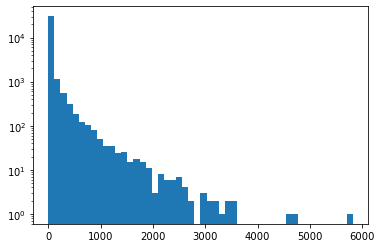

In [5]:
plt.hist(review_by_profilname, bins= 50)

plt.yscale("log")
plt.show()

In [8]:
len(review_by_profilname[review_by_profilname > 100])

3127

In [36]:
reviews['beer_style'].unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

### Top 20 cervezas mas populares.

In [14]:
top_beers_per_review = reviews.groupby('beer_name').size().sort_values(ascending=False)
display(top_beers_per_review.head(20))

beer_name
90 Minute IPA                                 3290
India Pale Ale                                3130
Old Rasputin Russian Imperial Stout           3111
Sierra Nevada Celebration Ale                 3000
Two Hearted Ale                               2728
Stone Ruination IPA                           2704
Arrogant Bastard Ale                          2704
Sierra Nevada Pale Ale                        2587
Stone IPA (India Pale Ale)                    2575
Pliny The Elder                               2527
Founders Breakfast Stout                      2502
Pale Ale                                      2500
Sierra Nevada Bigfoot Barleywine Style Ale    2492
La Fin Du Monde                               2483
60 Minute IPA                                 2475
Storm King Stout                              2452
Duvel                                         2450
Brooklyn Black Chocolate Stout                2447
Bell's Hopslam Ale                            2443
Samuel Adams Boston L

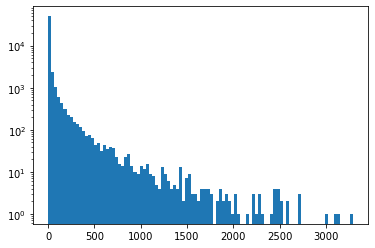

In [16]:
plt.hist(top_beers_per_review, bins= 100)
plt.yscale("log")
plt.show()

In [43]:
print(top_beers_per_review.median())
print(top_beers_per_review.mean())

3.0
27.905341470707214


### Top 20 estilos de cerveza más populares

In [6]:
top_beers_per_review = reviews.groupby('beer_style').size().sort_values(ascending=False)
display(top_beers_per_review.head(20))
print(len(top_beers_per_review))

top_beers_per_review.to_csv('review_style.csv')

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
American Porter                      50477
American Amber / Red Ale             45751
Belgian Strong Dark Ale              37743
Fruit / Vegetable Beer               33861
American Strong Ale                  31945
Belgian Strong Pale Ale              31490
Saison / Farmhouse Ale               31480
American Adjunct Lager               30749
Tripel                               30328
Witbier                              30140
Hefeweizen                           27908
American Barleywine                  26728
American Brown Ale                   25297
American Stout                       24538
American Pale Wheat Ale              24204
dtype: int64

104


### Usuario: northyorksammy

Como hemos visto anteriormente el usuario "northyorksammy" es quien mas reseñas ha proporcionado, analicemos sus datos para ver que podemos averiguar.

In [13]:
nys = reviews[reviews['review_profilename'] == 'northyorksammy']
display(nys.head())

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
46,1075,Caldera Brewing Company,1302401846,4.0,4.0,3.5,northyorksammy,Rauchbier,4.0,4.0,Rauch Ür Bock,7.4,58046
374,1075,Caldera Brewing Company,1286137884,3.5,3.5,3.5,northyorksammy,American IPA,3.5,3.5,Caldera IPA,6.1,10784
1499,163,Amstel Brouwerij B. V.,1221688593,1.0,3.0,3.0,northyorksammy,Euro Pale Lager,1.5,1.5,Amstel Lager,5.0,1414
1789,850,Moon River Brewing Company,1202616505,2.5,3.0,4.0,northyorksammy,Witbier,4.0,3.5,Wild Wacky Wit,4.8,19558
1836,850,Moon River Brewing Company,1202617946,3.5,4.0,4.0,northyorksammy,American Porter,3.5,3.5,The Captain's Porter,6.0,2780


In [19]:
print(len(nys))
print(nys.groupby('brewery_name').size().sort_values(ascending= False))
print(nys.groupby('beer_style').size().sort_values(ascending= False))
print(nys['review_overall'].mean())

5817
brewery_name
Great Lakes Brewery         80
Kuhnhenn Brewing Company    56
Mikkeller ApS               53
Cigar City Brewing          48
Brasserie Dieu Du Ciel      46
                            ..
Hog's Back Brewery           1
Browar Amber                 1
Browar Fortuna               1
Browary Warka Sp. z o.o.     1
The Alchemist                1
Length: 1053, dtype: int64
beer_style
American IPA                      382
American Pale Ale (APA)           236
American Double / Imperial IPA    234
American Porter                   185
Saison / Farmhouse Ale            181
                                 ... 
American Malt Liquor                3
Kvass                               2
Japanese Rice Lager                 2
Gose                                2
Faro                                1
Length: 103, dtype: int64
3.6293622141997592


Ahora sabemos que northyorksammy ha calificado 5817 cervezas en 1053 cervecerías diferentes, conocemos su bares recurrentes y los estilos de cerveza que más frecuenta.

In [9]:
display(beers_per_style)
display(top_beers_per_review)

style
American IPA                       44719
American Pale Ale (APA)            22159
American Imperial IPA              18338
Belgian Saison                     18167
American Wild Ale                  12972
                                   ...  
Finnish Sahti                        123
Japanese Happoshu                    123
Bière de Champagne / Bière Brut      116
Belgian Faro                          32
Wild/Sour Beers                        4
Length: 112, dtype: int64

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Length: 104, dtype: int64

In [13]:
df = pd.DataFrame([beers_per_style, top_beers_per_review])
display(df)

df.to_csv('style_duplicates.csv')

,American IPA,American Pale Ale (APA),American Imperial IPA,Belgian Saison,American Wild Ale,American Imperial Stout,American Porter,American Amber / Red Ale,American Stout,Fruit and Field Beer,...,Keller Bier / Zwickel Bier,Black & Tan,Kristalweizen,Lambic - Unblended,Sahti,Gose,Faro,Roggenbier,Kvass,Happoshu
0,44719.0,22159.0,18338.0,18167.0,12972.0,11180.0,10168.0,9748.0,9103.0,7729.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117586.0,63469.0,NaN,NaN,17794.0,NaN,50477.0,45751.0,24538.0,NaN,...,2591.0,2358.0,2204.0,1114.0,1061.0,686.0,609.0,466.0,297.0,241.0
